In [84]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld_env import get_task1_gridworld, get_task2_gridworld, get_task3_gridworld
from utils import paint_gridworld

## A Look Around GridWorld

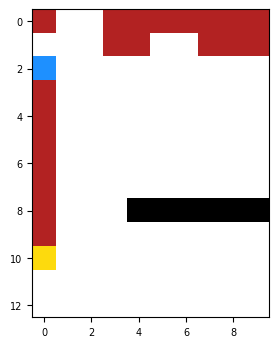

In [85]:
# Initiating the Environment. The method get_task1_gridworld
# initialises the environment for the task 1. Similarly there are methods to initialise the environment 
# for the other tasks
env1 = get_task1_gridworld()

# This is how the environment looks like
paint_gridworld(env1, figsize=(4,4), ticksize=7)

## Example of running a simulation 

In [86]:
reward_lst = []

# Initialise the environment
# An arbitary gamma value is used here. You may need to change this!
env1 = get_task1_gridworld()

# Reset the environment to start from the starting location. 
# The reset() method returns the state, reward, and whether the episode is done or not
# More information can be found under the definition of the method
_, state, reward, done = env1.reset()
reward_lst.append(reward)

# While the trial is not done, i.e. the agent has not fallen into lava,
# the maximum length of the episode has not been exceeded, and the target has not been reached
while not done:
    
    # Take a step using the step() function and passing in one of the available actions [0, 1, 2, 3] 
    # corresponding to ['N', 'S', 'E', 'W']
    # More information can be found under the definition of the method
    # In this very simple example for each step we choose a random action
    _, state, reward, done = env1.step(np.random.choice(4))
    reward_lst.append(reward)

print(f'Collected rewards of an episode: {reward_lst}')

Collected rewards of an episode: [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -10.0]


In [87]:
class Q_agent():
    def __init__(self):
        self.q_table = None

    def solve(self, env, n_episodes=500, gamma=0.3, alpha=0.5, epsilon=0.6):
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        
        # Initialize Q-table with zeros
        self.q_table = np.zeros((state_size, action_size))
        
        total_rewards = []
        total_steps = []
        episode_sequences = []
        
        for episode in range(n_episodes):
            state = env.reset()[1]
            total_reward = 0
            steps = 0
            sequence = [(state, self.choose_action(state, epsilon))]
            
            while True:
                action = self.choose_action(state, epsilon)
                t, next_state, reward, done = env.step(action)
                
                q_current = self.q_table[state, action]
                q_next = np.max(self.q_table[next_state])
                self.q_table[state, action] = q_current + alpha * (reward + gamma * q_next - q_current)
                
                state = next_state
                sequence.append((state, action))
                total_reward += reward
                steps += 1
                
                if done:
                    break
            
            total_rewards.append(total_reward)
            total_steps.append(steps)
            episode_sequences.append(sequence)
        
        policy = np.argmax(self.q_table, axis=1)
        return policy, total_rewards, total_steps, episode_sequences

    def choose_action(self, state, epsilon):
        if np.random.uniform(0, 1) < epsilon:
            return np.random.choice(4)
        else:
            return np.argmax(self.q_table[state])

In [88]:
class SARSA_agent():
    def __init__(self):
        self.q_table = None

    def solve(self, env, n_episodes=500, gamma=0.3, alpha=0.5, epsilon=0.6):
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        
        # Initialize Q-table with zeros
        self.q_table = np.zeros((state_size, action_size))
        
        total_rewards = []
        total_steps = []
        episode_sequences = []
        
        for episode in range(n_episodes):
            state = env.reset()[1]
            action = self.choose_action(state, epsilon)
            total_reward = 0
            steps = 0
            sequence = [(state, action)]
            
            while True:
                t, next_state, reward, done = env.step(action)
                next_action = self.choose_action(next_state, epsilon)
                
                q_current = self.q_table[state, action]
                q_next = self.q_table[next_state, next_action]
                self.q_table[state, action] = q_current + alpha * (reward + gamma * q_next - q_current)
                
                state, action = next_state, next_action
                sequence.append((state, action))
                total_reward += reward
                steps += 1
                
                if done:
                    break
            
            total_rewards.append(total_reward)
            total_steps.append(steps)
            episode_sequences.append(sequence)
        
        policy = np.argmax(self.q_table, axis=1)
        return policy, total_rewards, total_steps, episode_sequences

    def choose_action(self, state, epsilon):
        if np.random.uniform(0, 1) < epsilon:
            return np.random.choice(4)
        else:
            return np.argmax(self.q_table[state])

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plot_episode_sequence(env, sequence, episode_num):
    grid_shape = env.get_gridshape()
    directions = ['↑', '→', '↓', '←']
    direction_arrows = {'↑': (0, -0.3), '→': (0.3, 0), '↓': (0, 0.3), '←': (-0.3, 0)}
    
    plt.figure(figsize=(10, 10))
    plt.imshow(np.ones(grid_shape), cmap='gray_r', extent=[0, grid_shape[1], grid_shape[0], 0])
    
    # Draw the environment features
    lava_locs = env.get_lava_loc()
    for lava in lava_locs:
        plt.gca().add_patch(plt.Rectangle((lava[1], lava[0]), 1, 1, color='red'))
    
    goal_locs = env.get_goal_loc()
    for goal in goal_locs:
        plt.gca().add_patch(plt.Rectangle((goal[1], goal[0]), 1, 1, color='blue'))
    
    start_loc = env.get_starting_loc()
    plt.gca().add_patch(plt.Rectangle((start_loc[1], start_loc[0]), 1, 1, color='yellow'))
    
    walls = env.get_walls_loc()
    for wall in walls:
        plt.gca().add_patch(plt.Rectangle((wall[1], wall[0]), 1, 1, color='black'))
    
    # Draw the path
    for i in range(len(sequence) - 1):
        state, action = sequence[i]
        next_state, next_action = sequence[i + 1]
        loc = env.get_loc_from_state(state)
        next_loc = env.get_loc_from_state(next_state)
        
        # Draw the arrow
        plt.text(loc[1] + 0.5, loc[0] + 0.5, directions[action], ha='center', va='center', color='black', fontsize=15)
        
        # Draw the connecting line
        plt.plot([loc[1] + 0.5, next_loc[1] + 0.5], [loc[0] + 0.5, next_loc[0] + 0.5], 'k-', lw=2)
    
    # Draw the final state action
    final_state, final_action = sequence[-1]
    final_loc = env.get_loc_from_state(final_state)
    plt.text(final_loc[1] + 0.5, final_loc[0] + 0.5, directions[final_action], ha='center', va='center', color='black', fontsize=15)
    
    plt.title(f'Episode {episode_num}')
    plt.gca().invert_yaxis()
    plt.show()


# Task 1 - Single Target, Deterministic Rewards:

In [106]:
# Example of Hyperparameters
# This is just an example, you can add to this depending on which method you utilise

gamma = 0.5
# Alpha === Learning Rate
alpha = 0.1
epsilon = 0.2
n_episodes = 500

In [107]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env1 = get_task1_gridworld()

In [108]:
# Example of running SARSA
sarsa_agent = SARSA_agent()
policy_sarsa, rewards_sarsa, steps_sarsa, episode_sequences_sarsa = sarsa_agent.solve(env1, n_episodes, gamma, alpha, epsilon)

In [109]:
# Example of running Q-Learning
q_agent = Q_agent()
policy_q, rewards_q, steps_q, episode_sequences_q = q_agent.solve(env1, n_episodes, gamma, alpha, epsilon)

In [110]:
# Do your plots below! Include any new function definitions in this jupyter notebook!

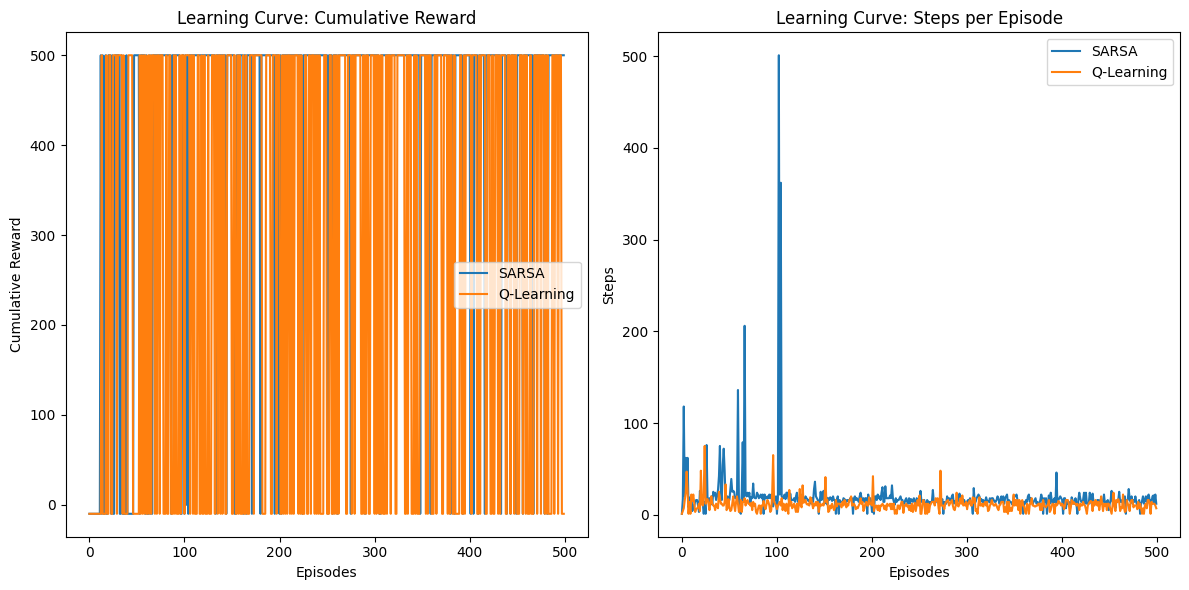

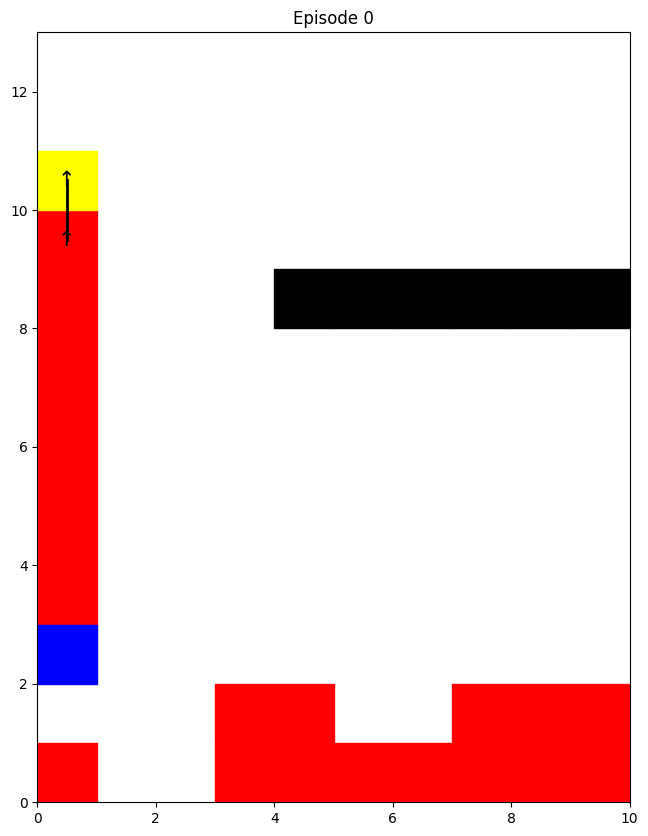

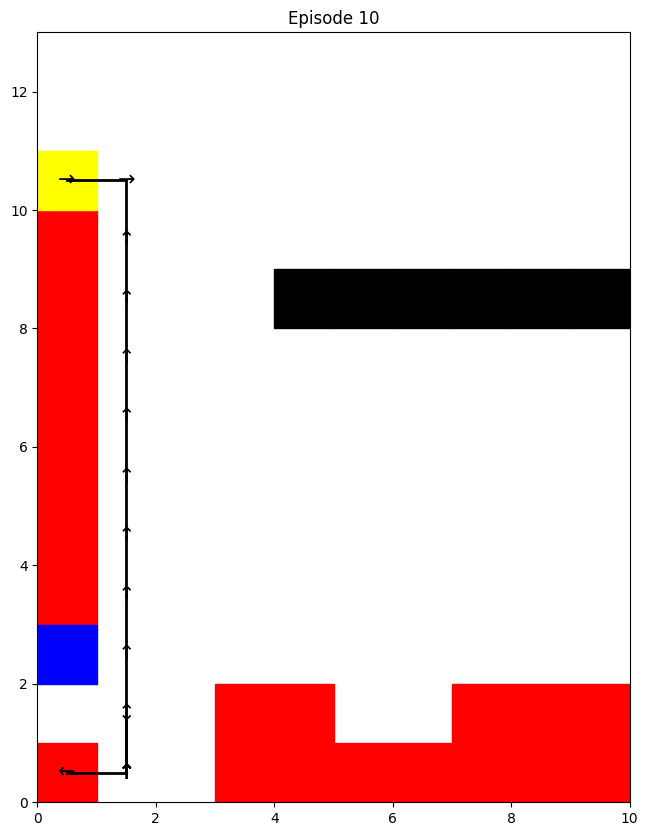

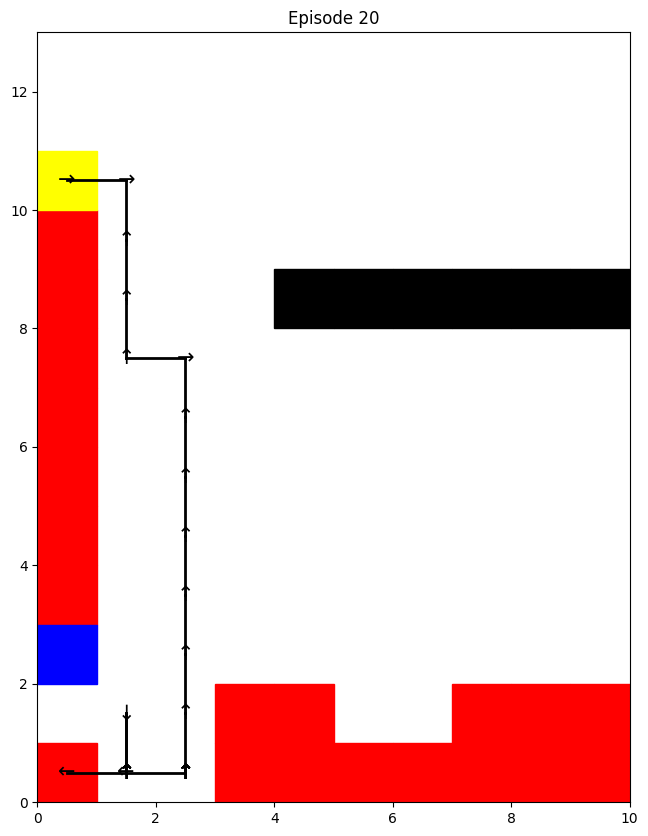

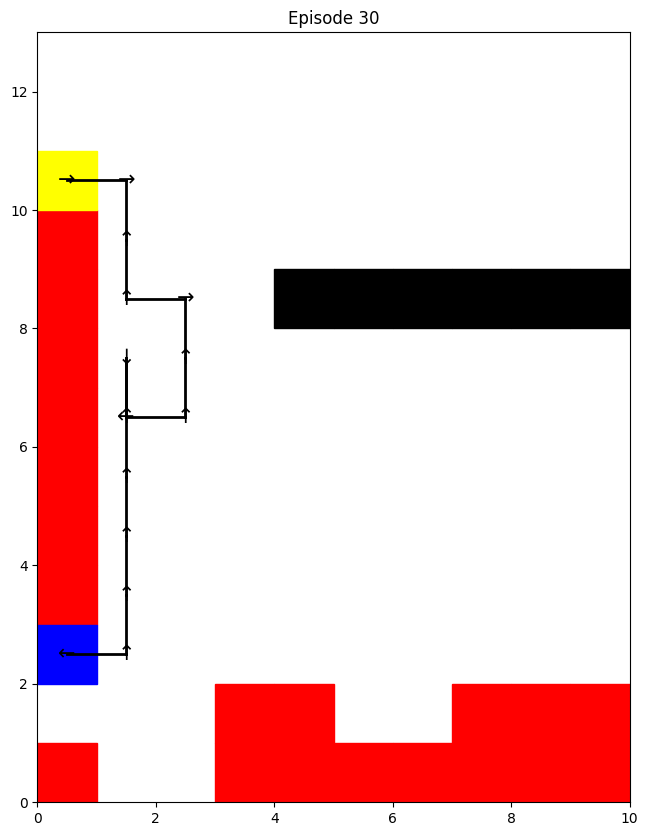

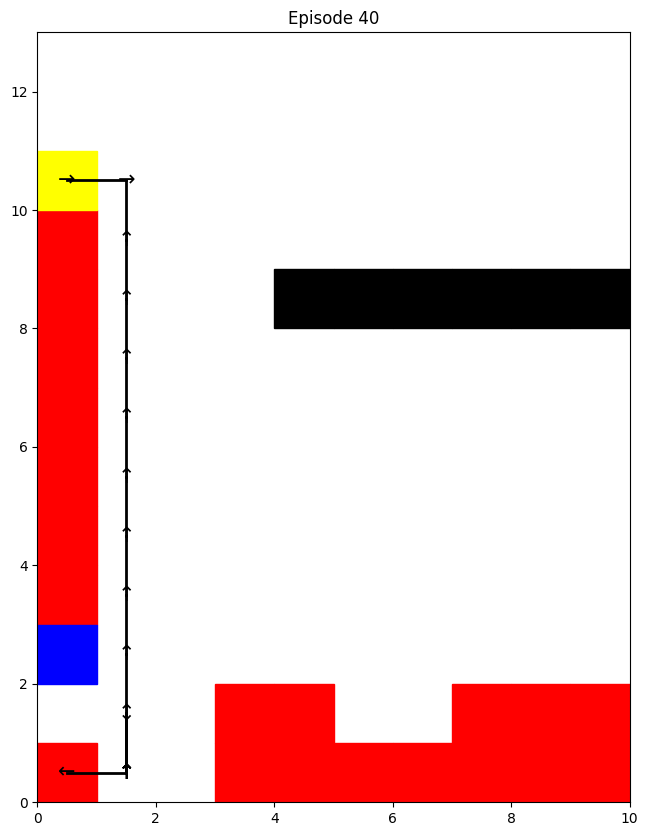

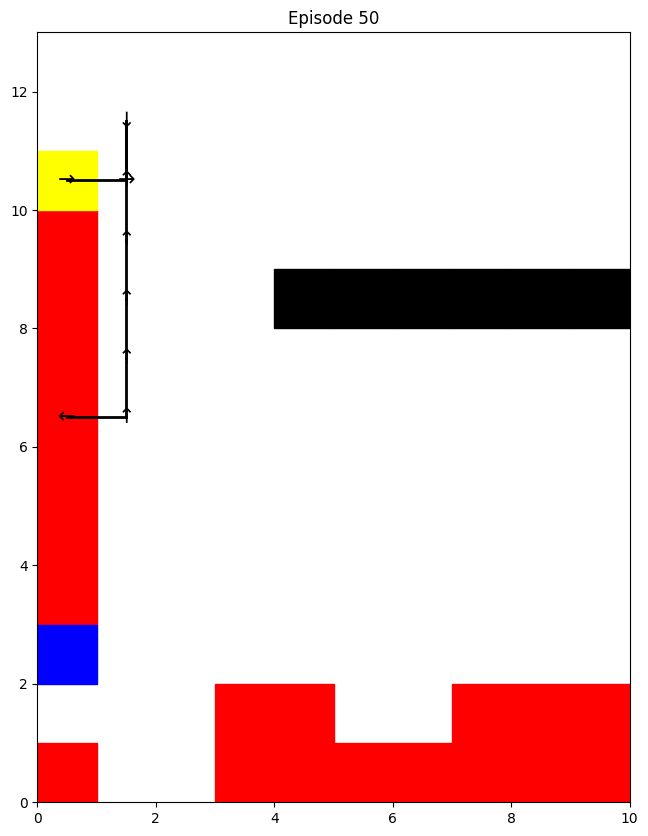

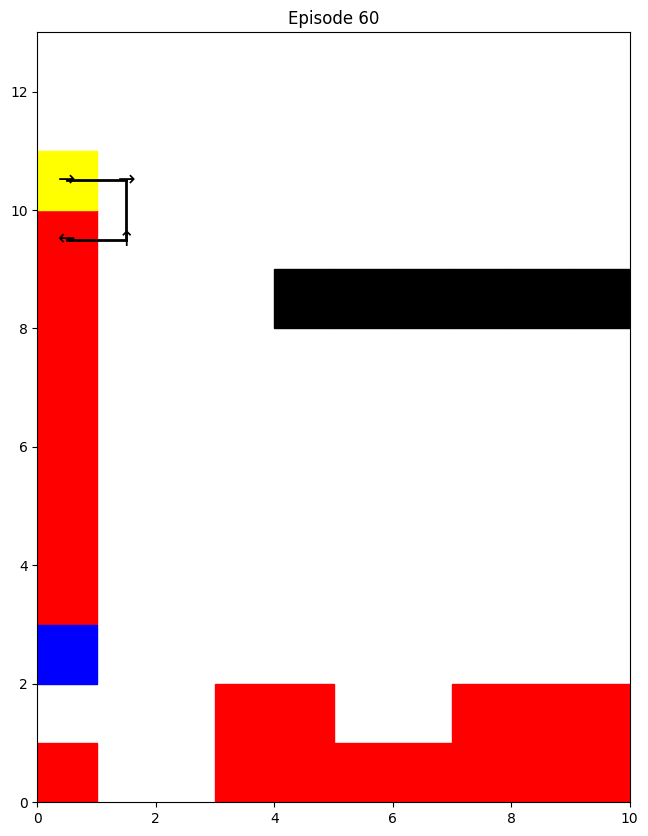

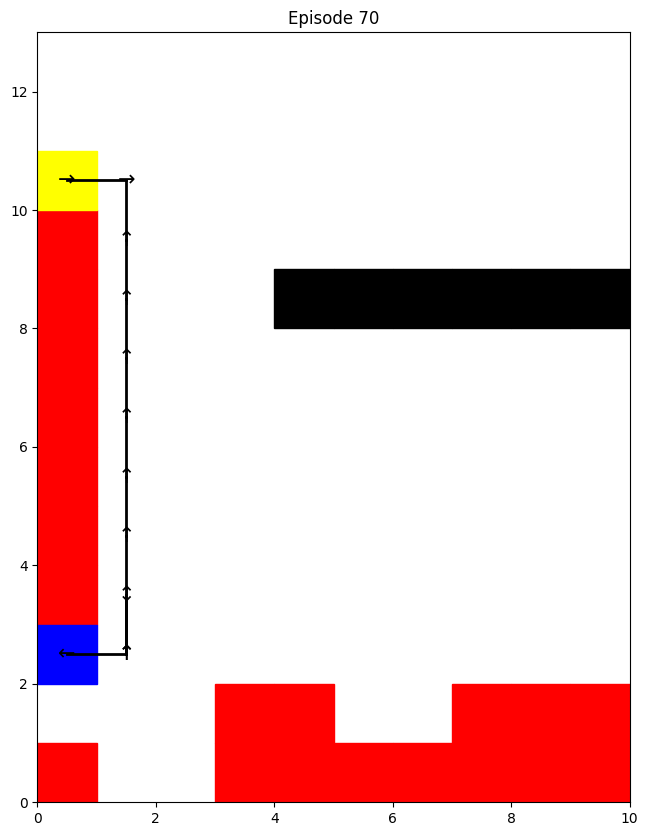

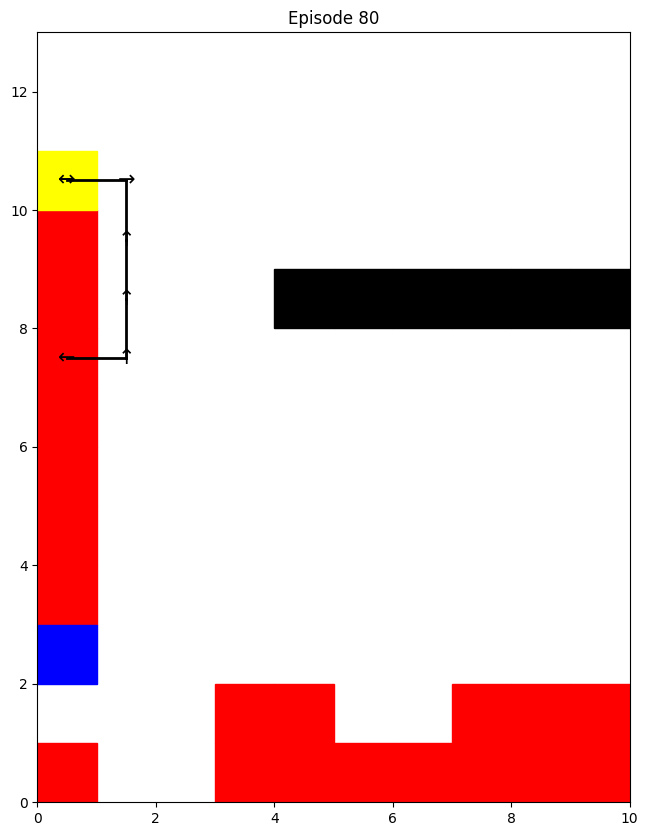

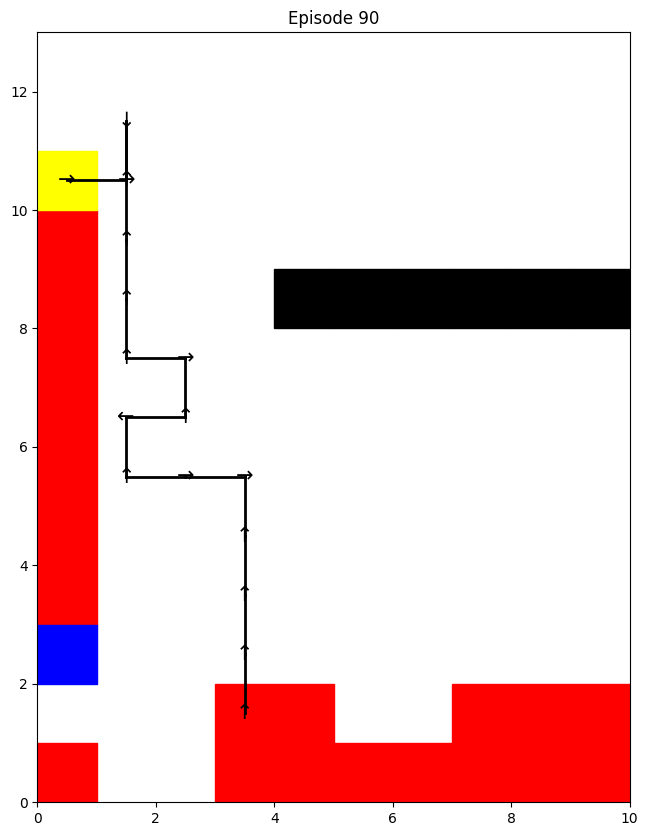

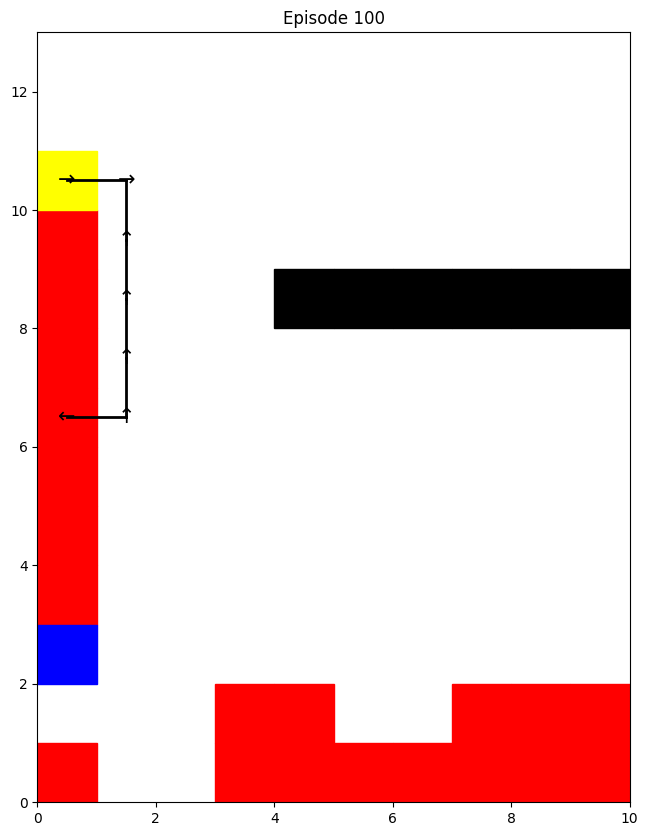

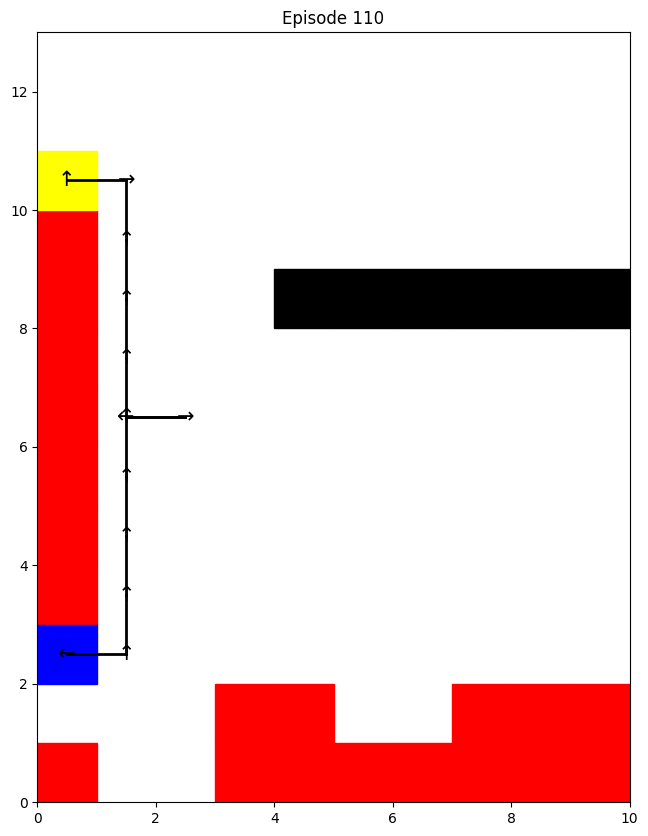

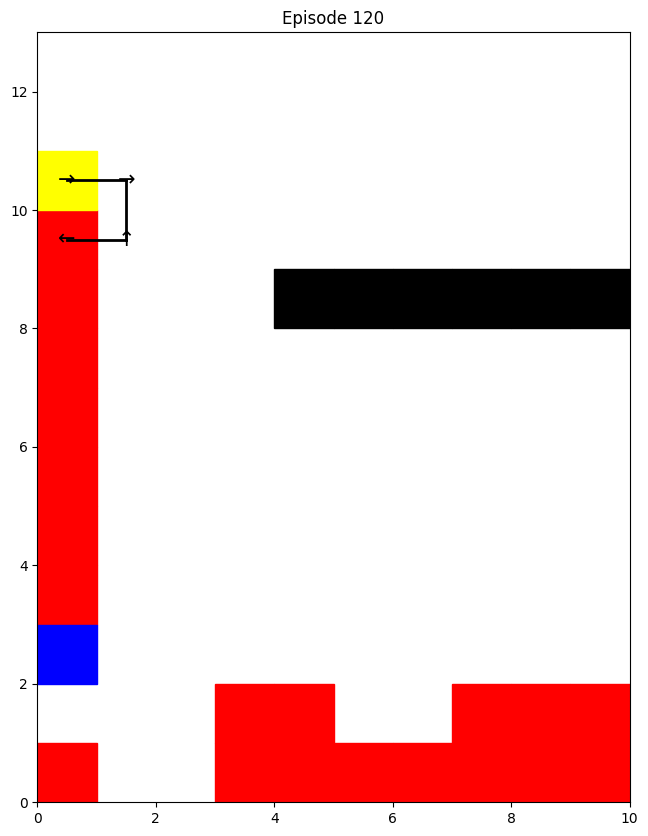

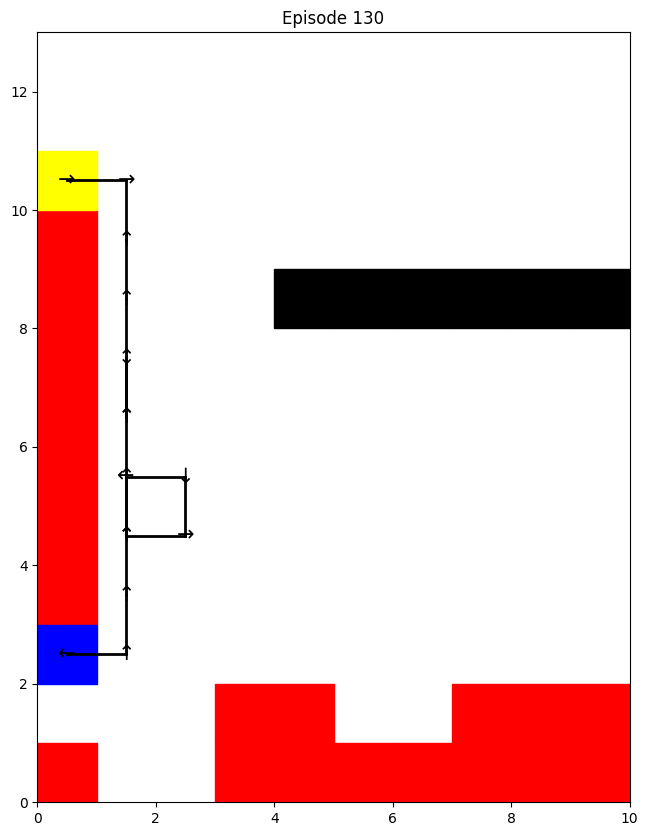

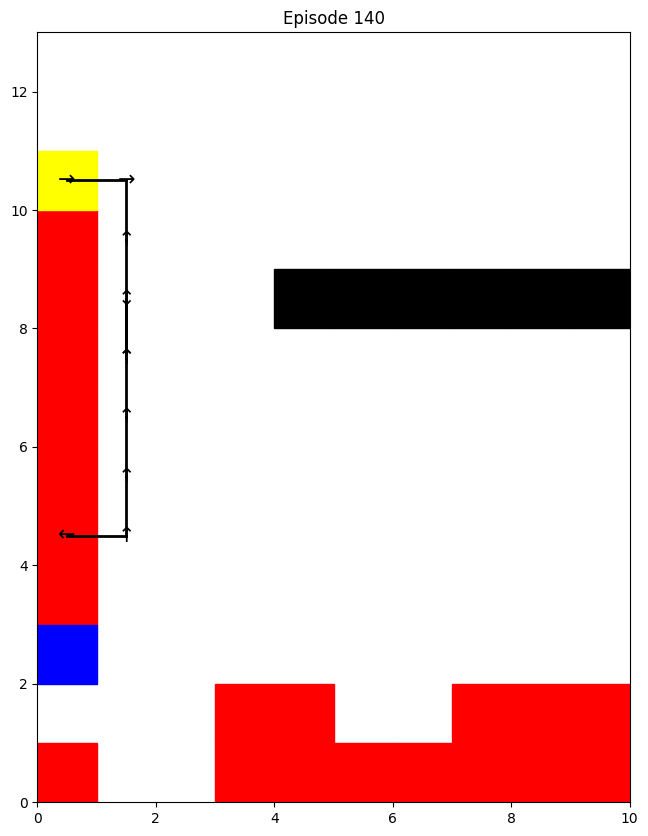

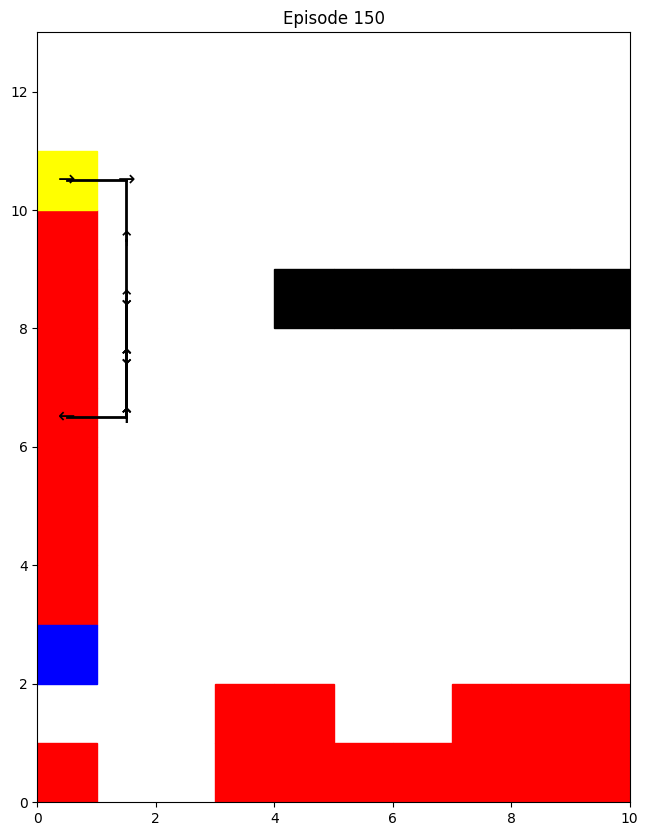

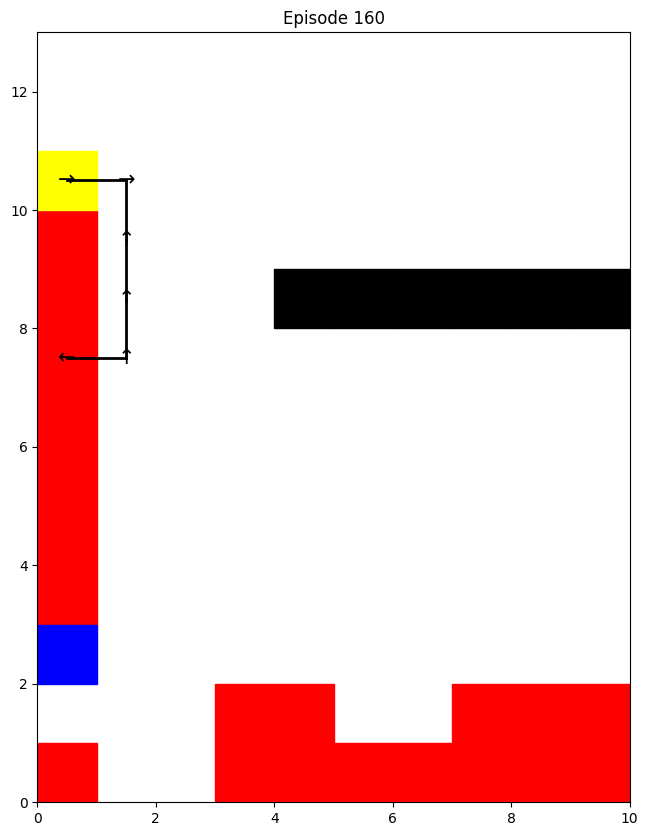

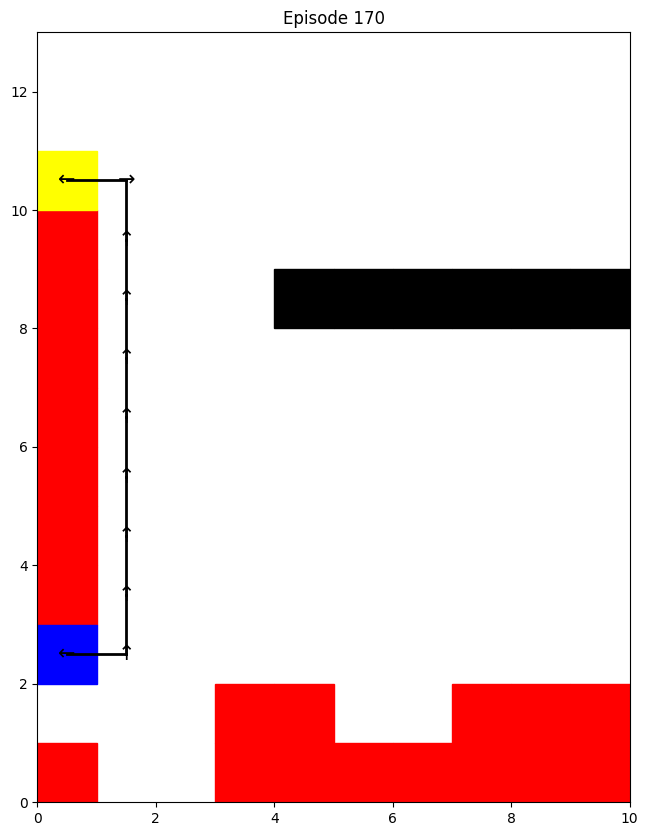

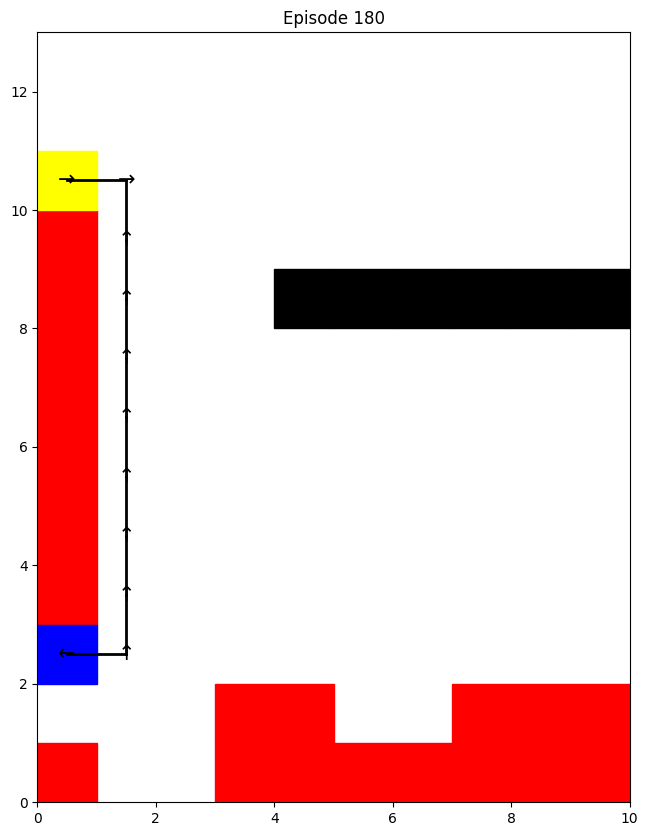

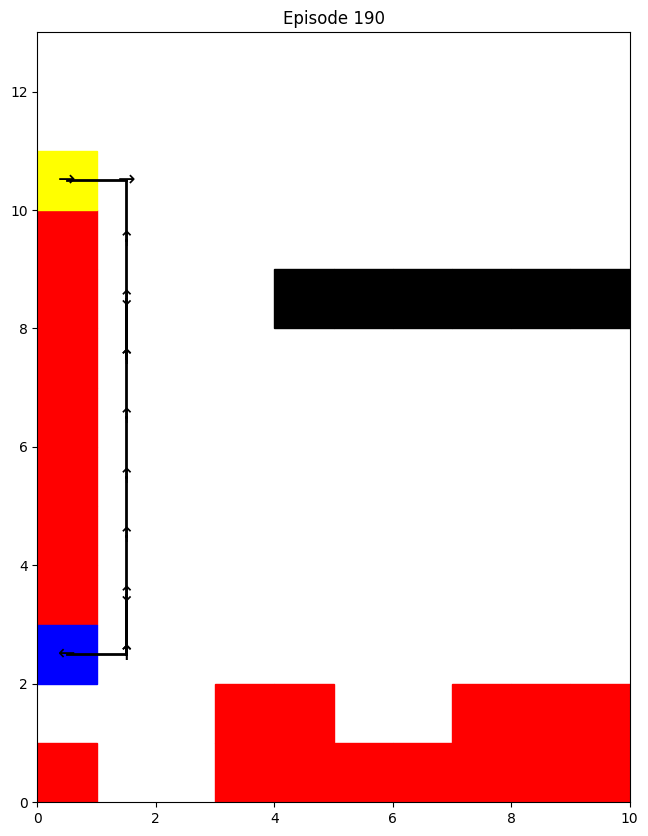

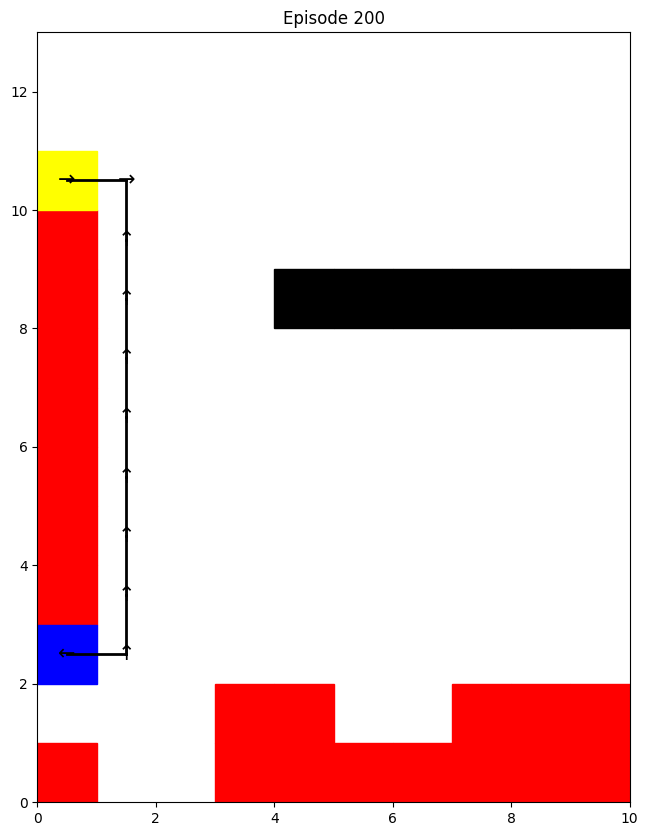

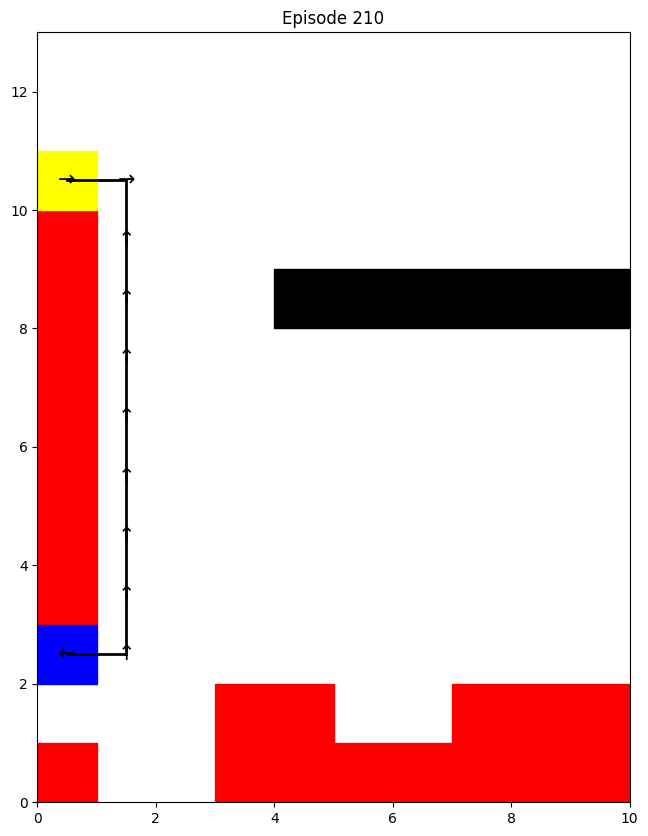

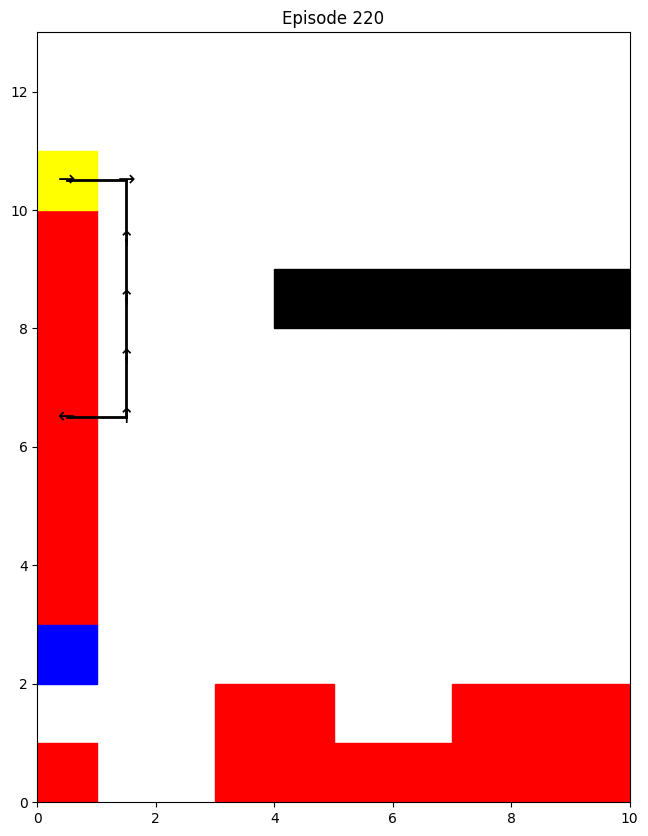

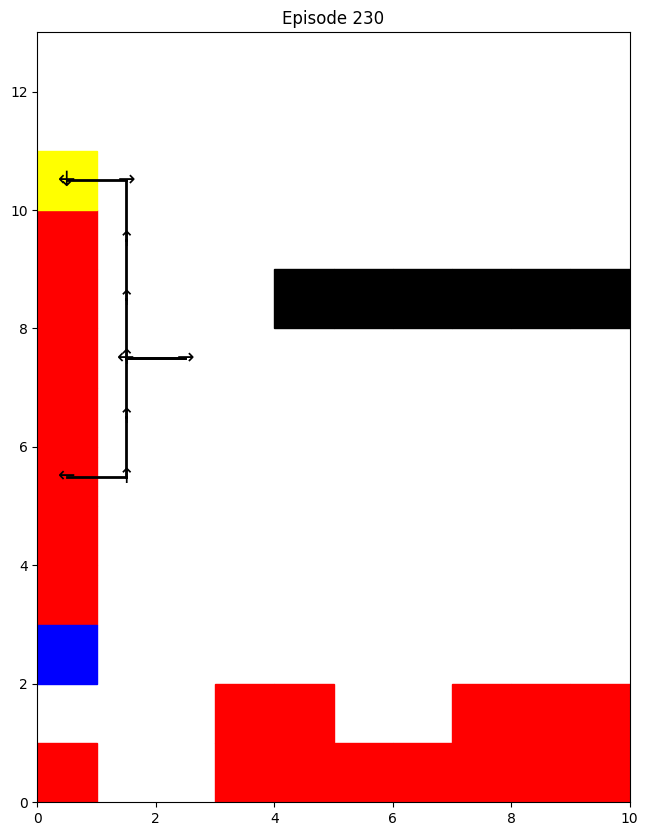

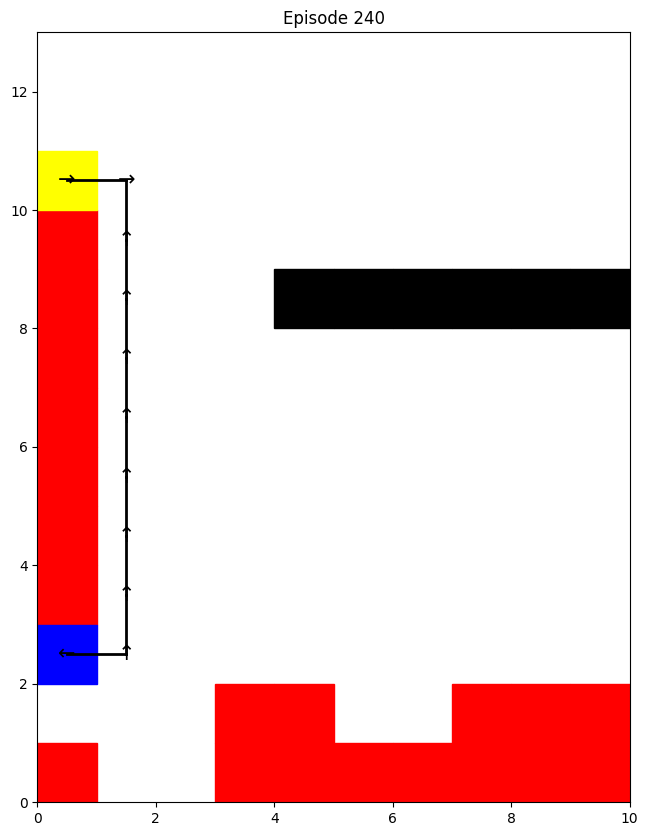

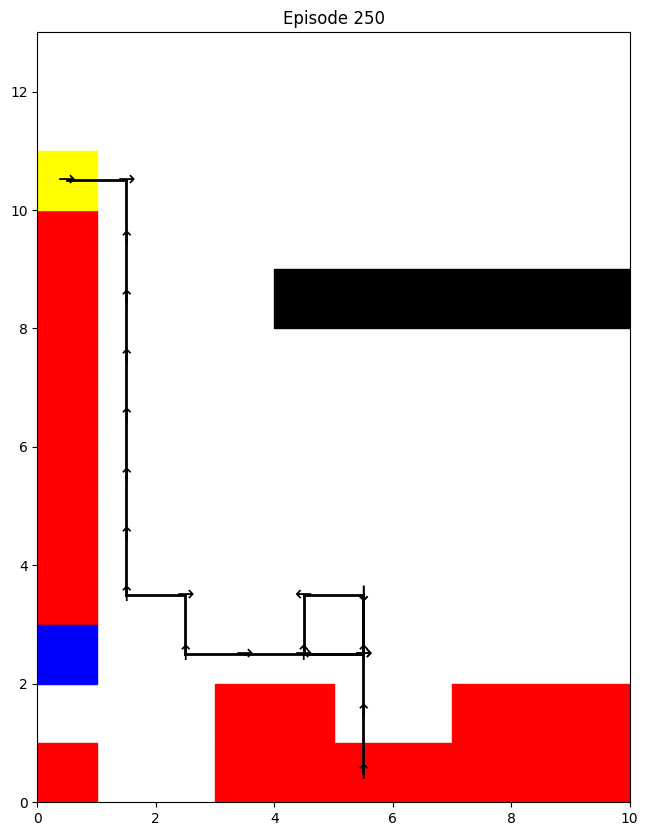

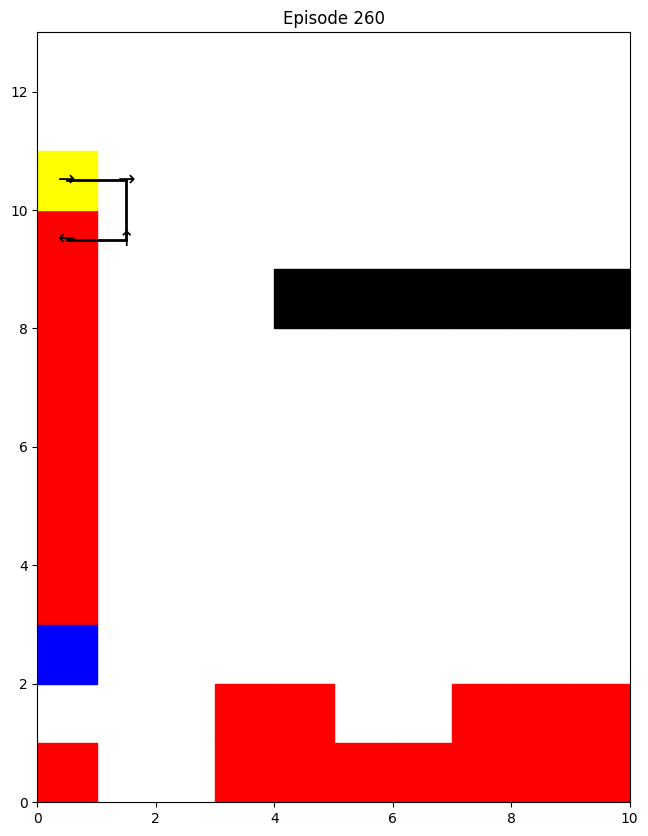

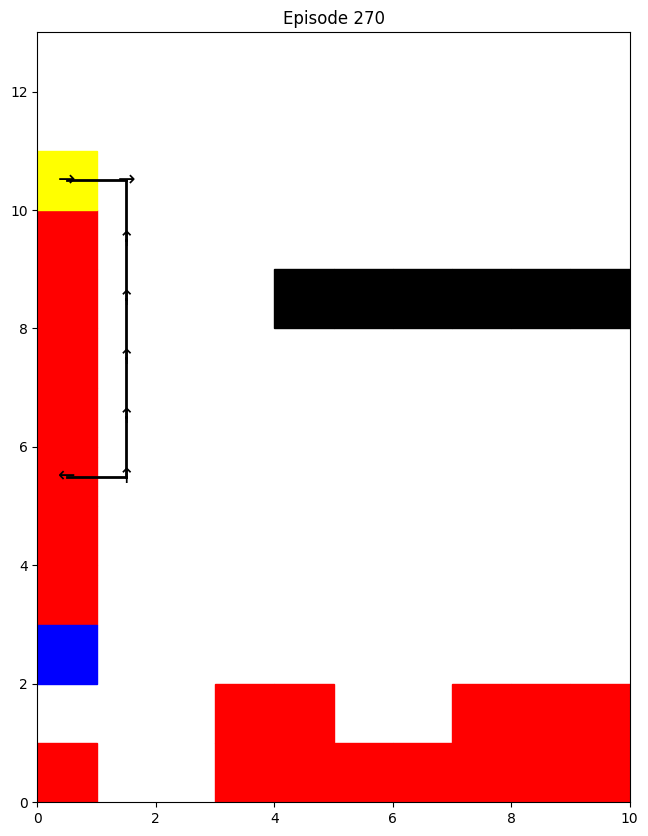

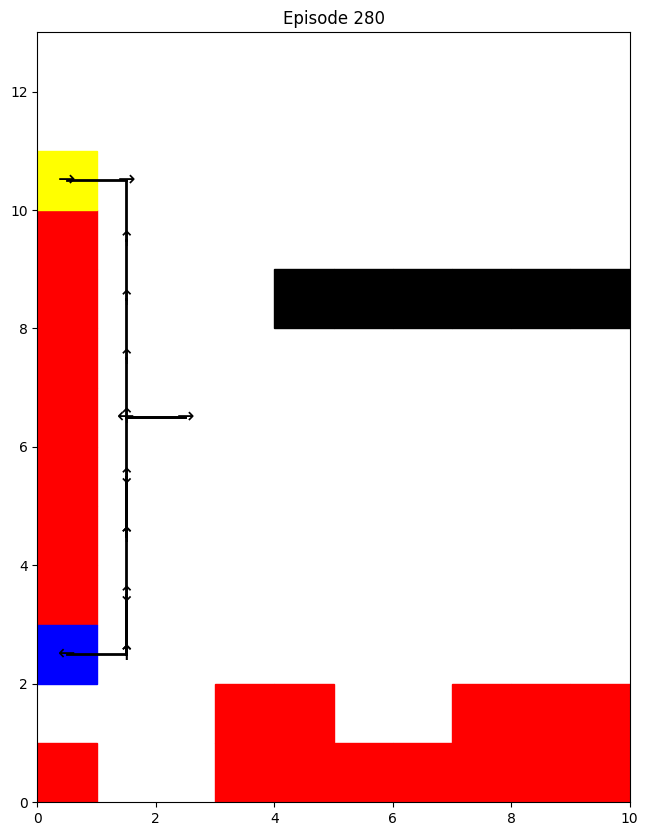

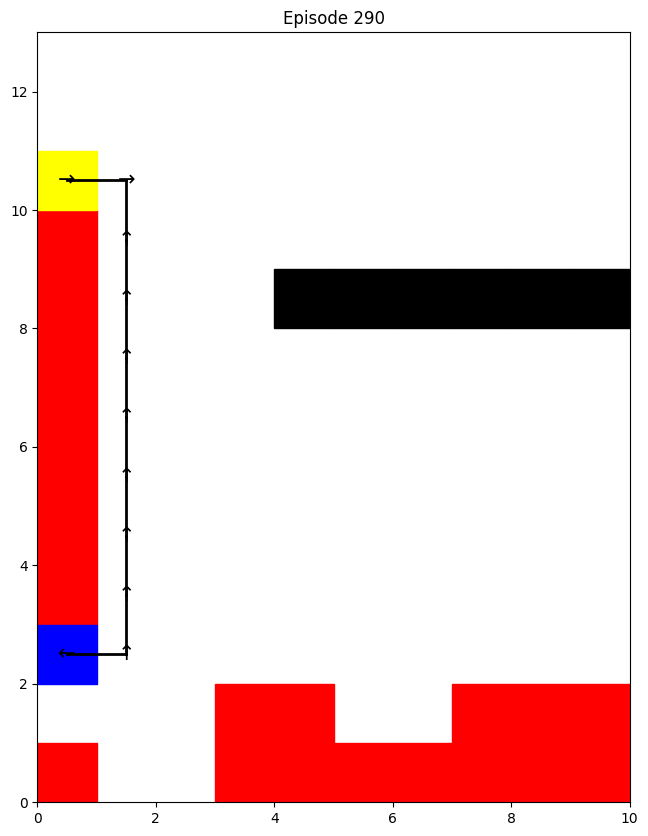

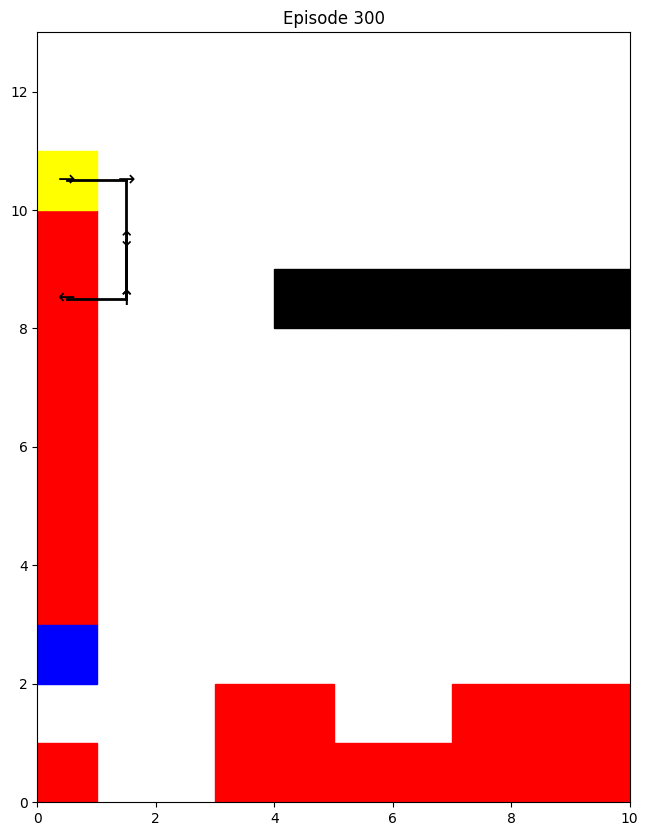

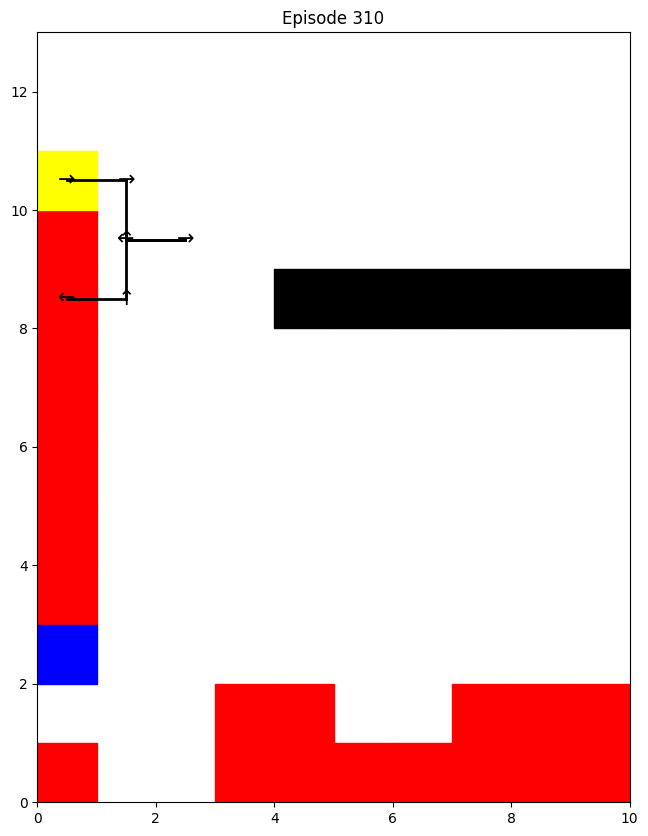

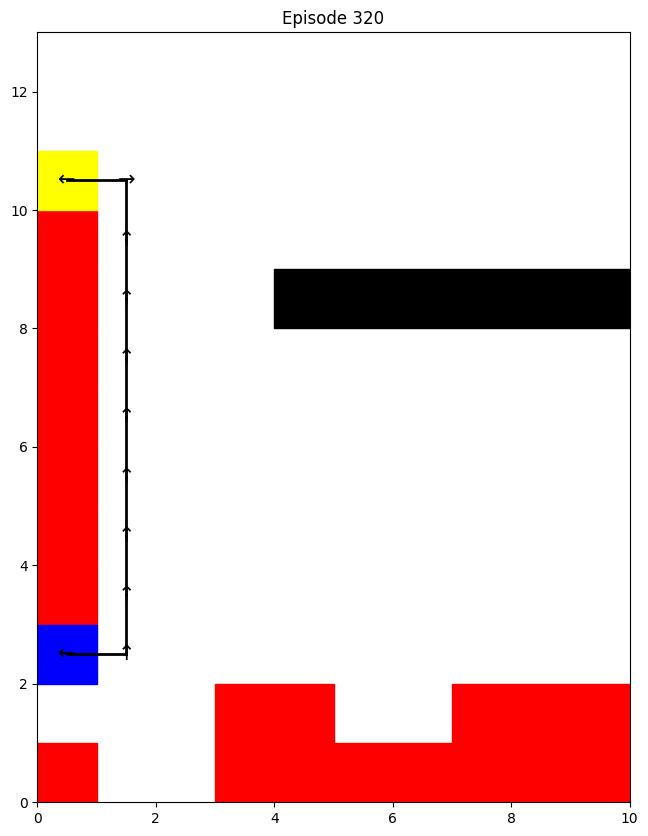

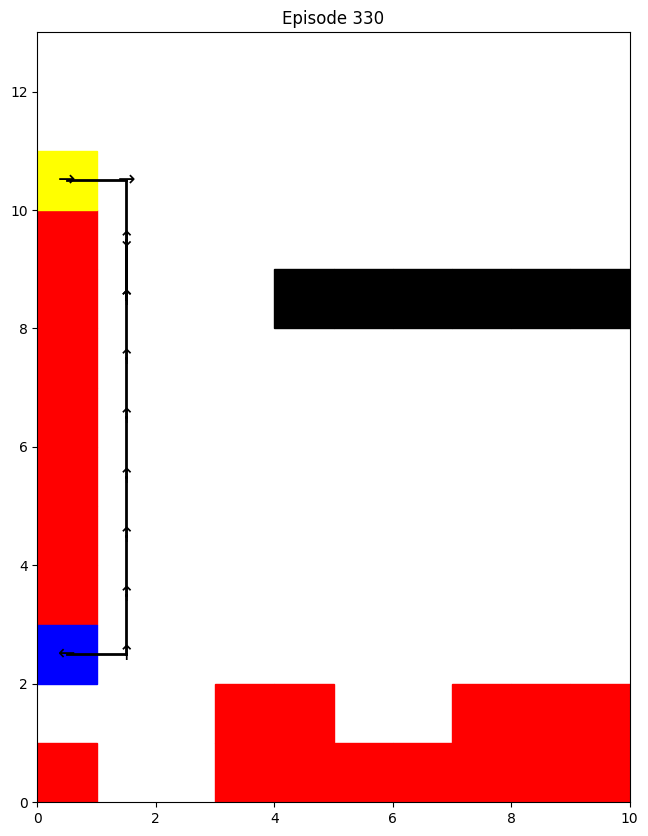

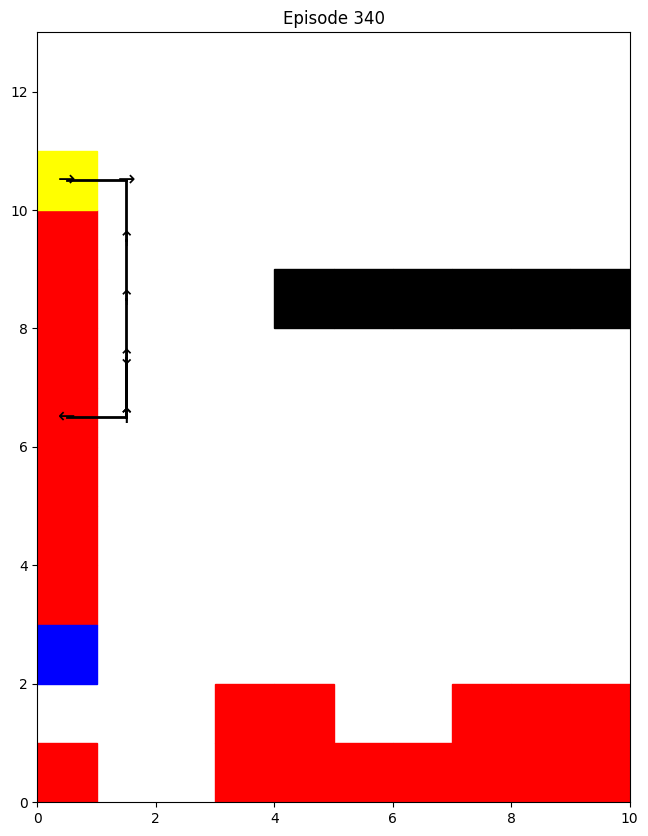

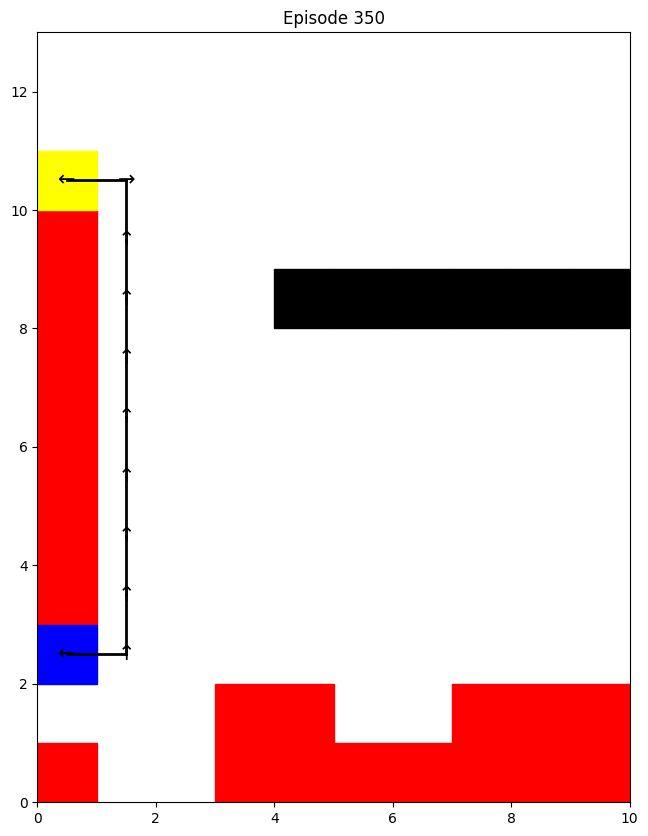

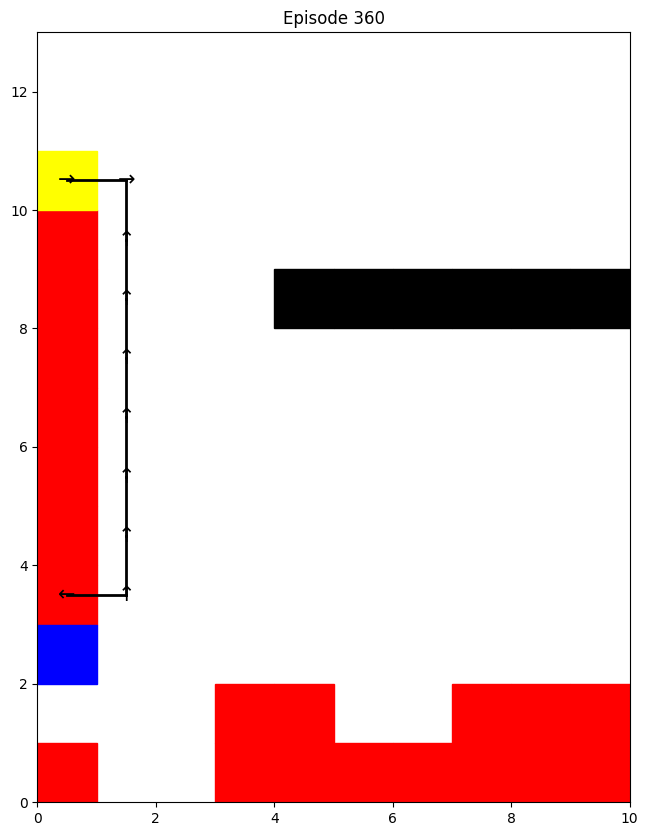

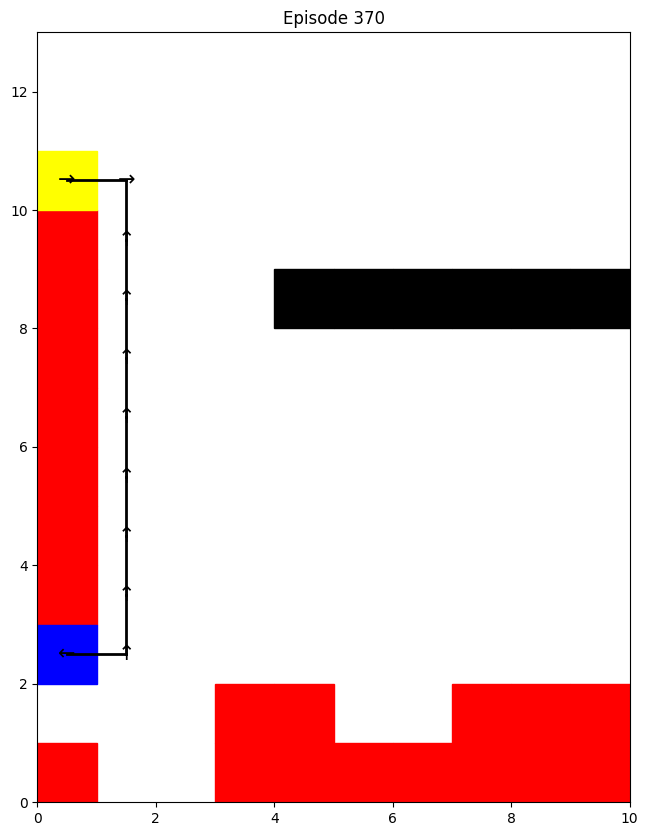

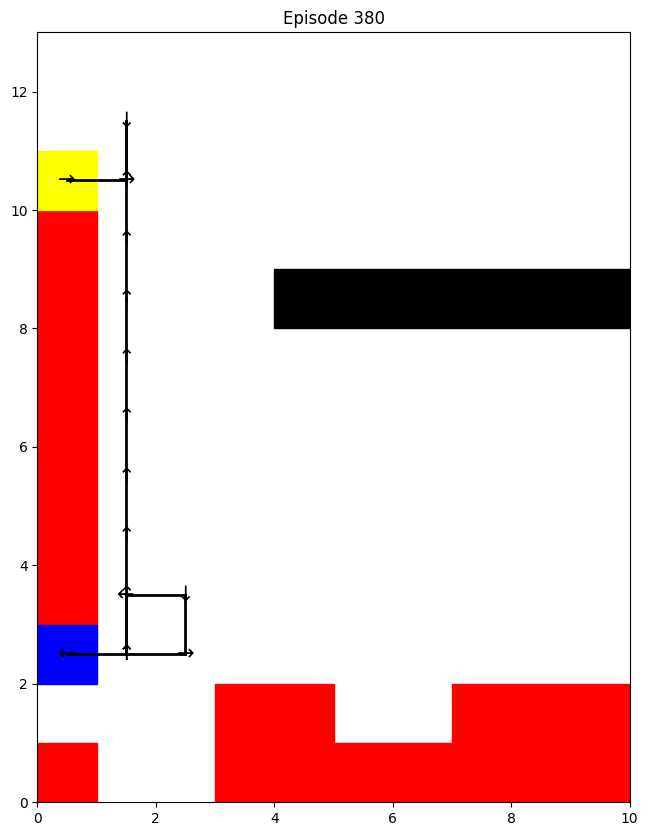

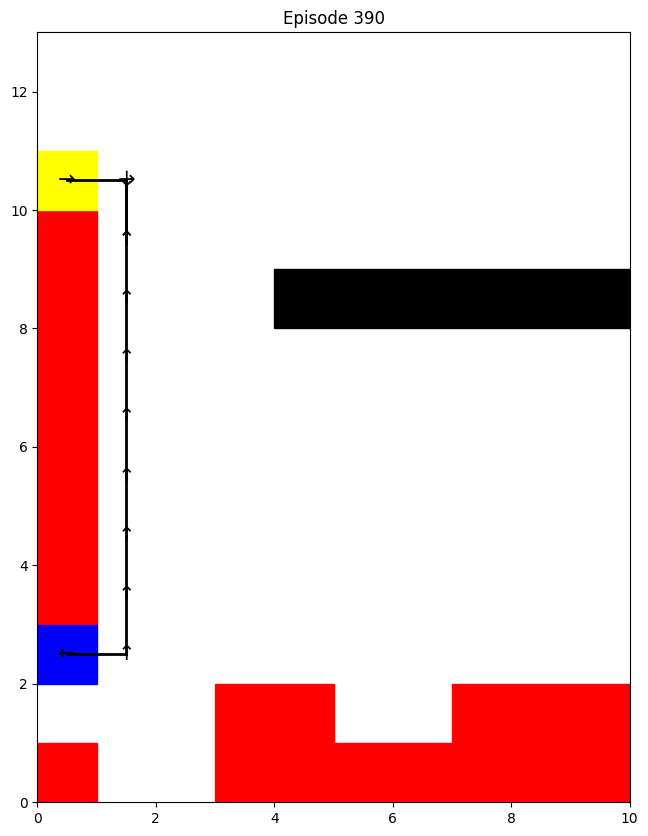

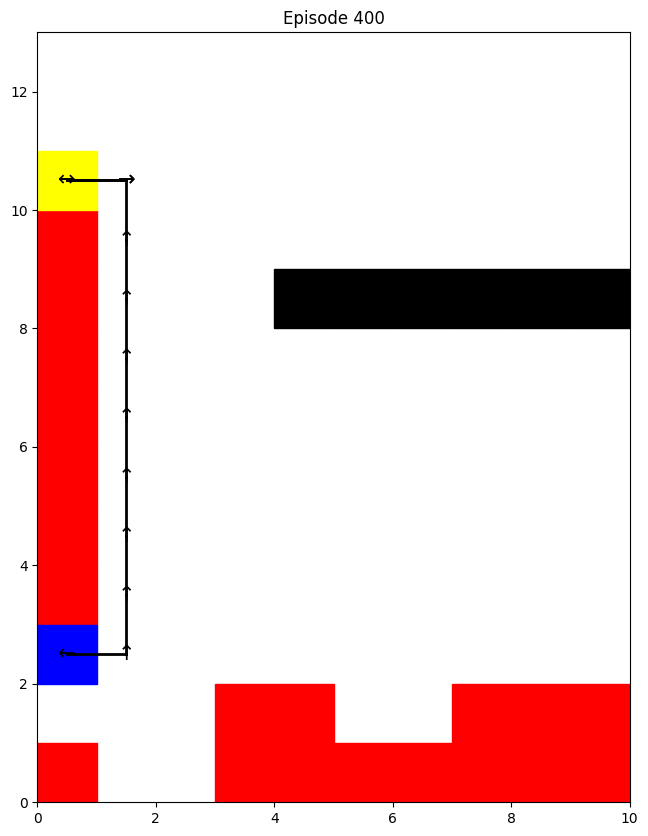

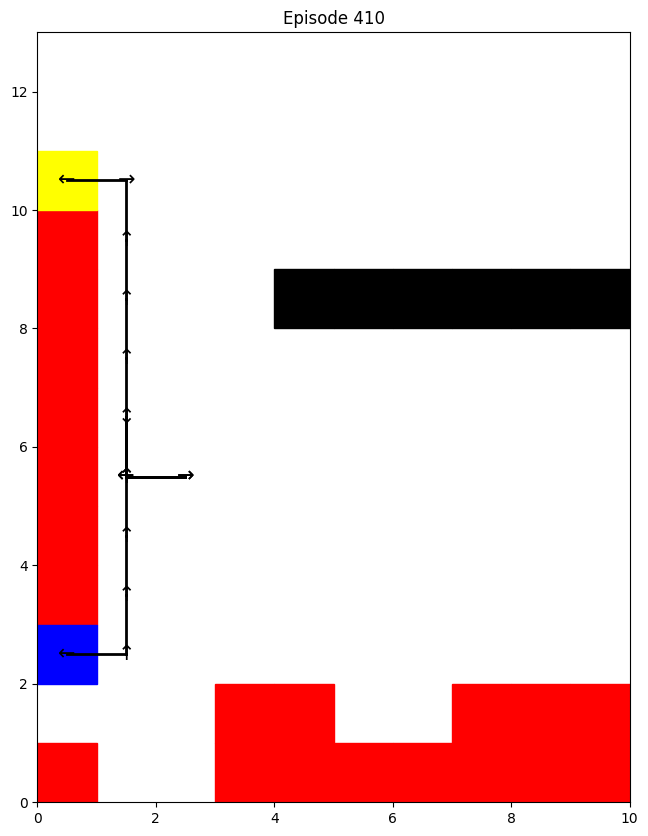

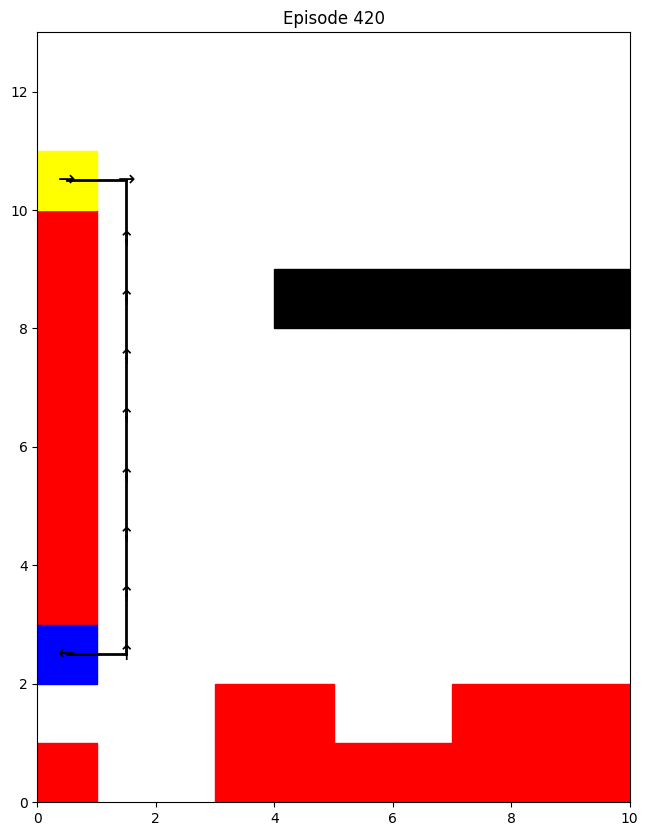

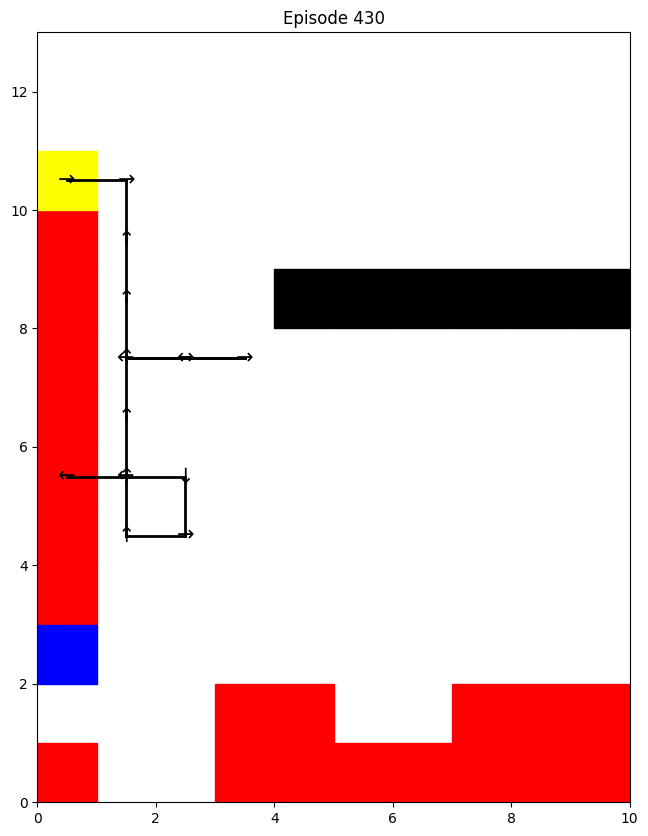

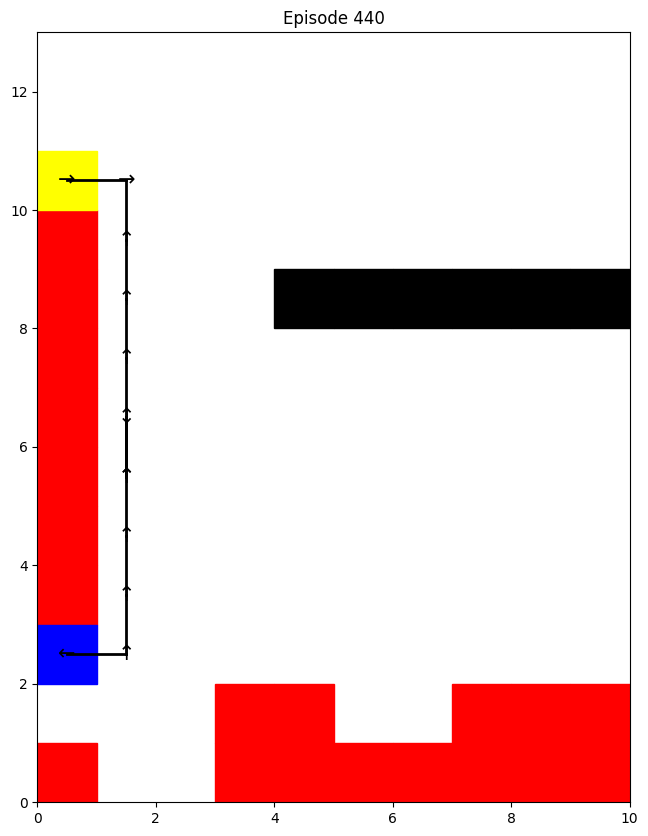

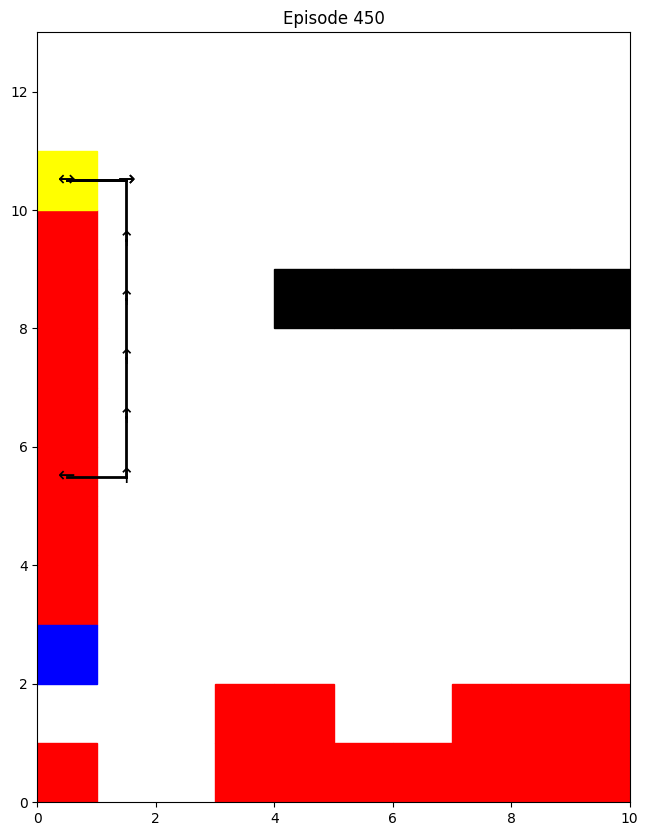

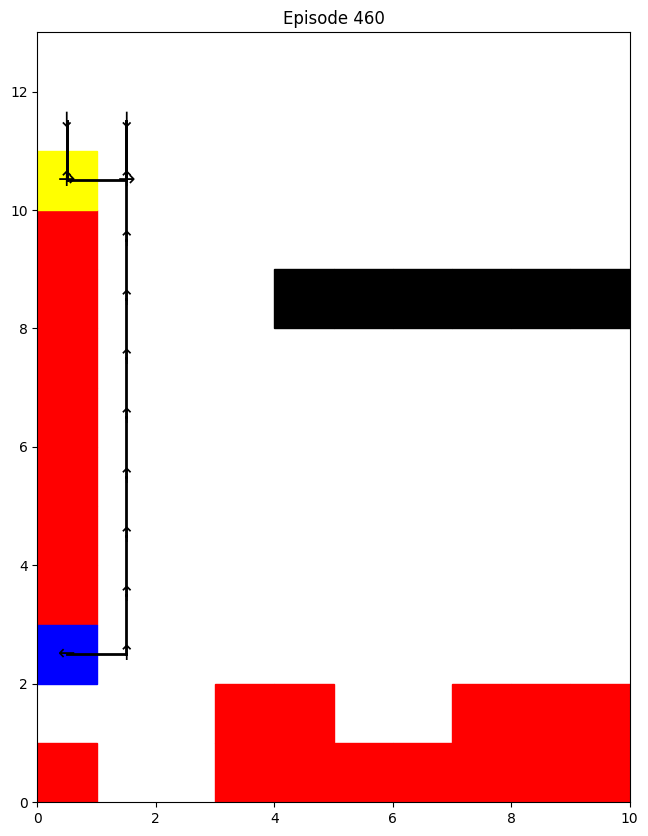

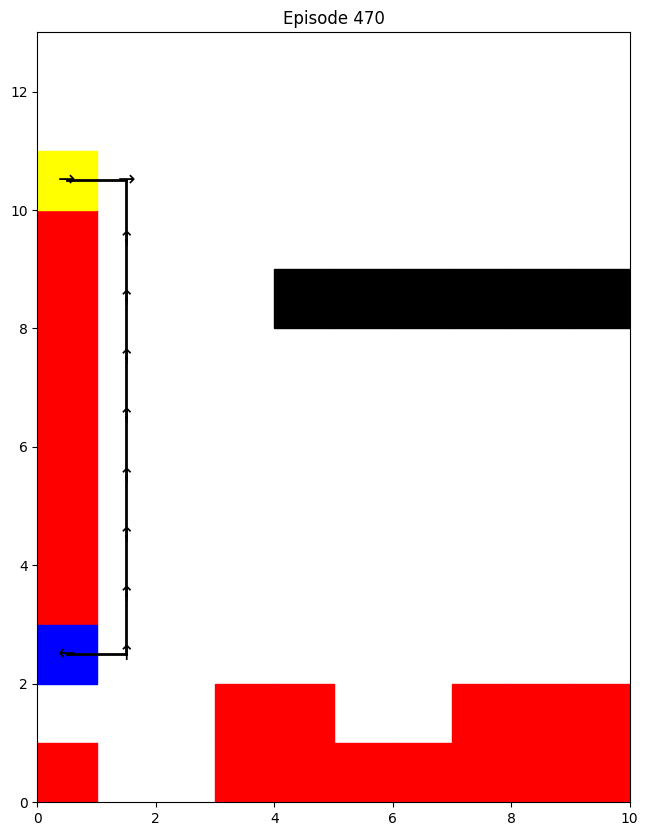

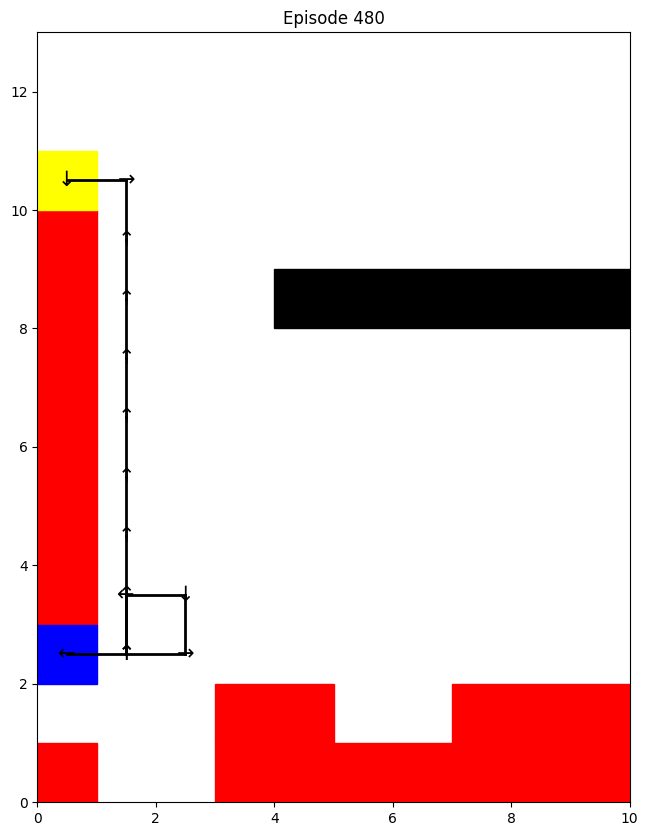

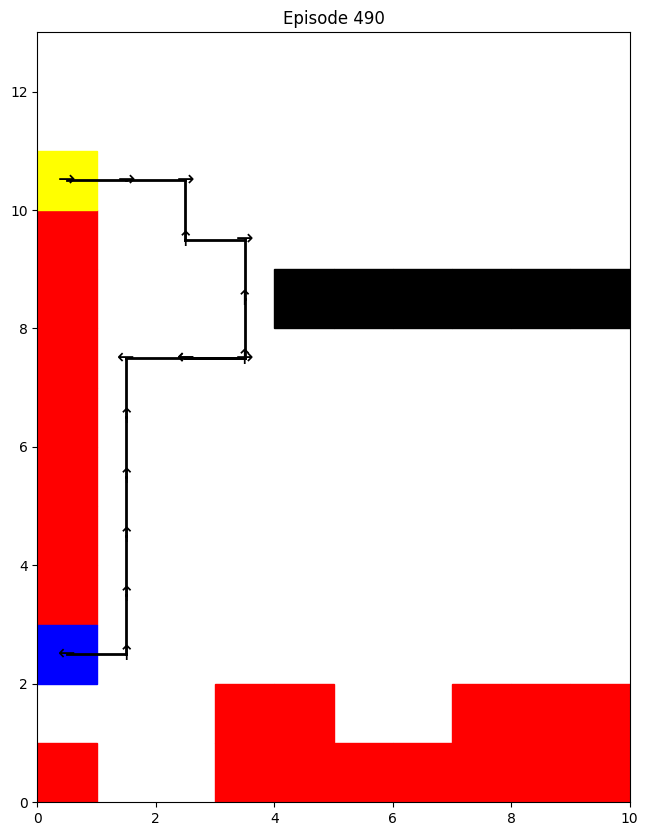

In [111]:
# Plot learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(rewards_sarsa, label='SARSA')
plt.plot(rewards_q, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Learning Curve: Cumulative Reward')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(steps_sarsa, label='SARSA')
plt.plot(steps_q, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Learning Curve: Steps per Episode')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the first episode sequence for SARSA
i = 0
while i < 50:
    plot_episode_sequence(env1, episode_sequences_q[(10*i)], episode_num=(10*i))
    i += 1


# Task 2 - Dual Targets with Stochastic Rewards

In [25]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env2 = get_task2_gridworld()

In [27]:
# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env2)

AttributeError: 'SARSA_agent' object has no attribute 'q_table'

In [ ]:
# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env2)

In [ ]:
# Do your plots below! Include any new function definitions in this jupyter notebook!

# Task 3 - Stochastic Transitions and Rewards

In [ ]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env3 = get_task3_gridworld()

In [ ]:
# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env3)

In [ ]:
# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env3)

In [ ]:
# Do your plots below! Include any new function definitions in this jupyter notebook!